Q: I would like the program to pull out keywords (that I haven't already selected) from the text that describe a natural element. From there, I would like it to assign a tone/sentiment to the keyword and track the overall tone of the plays based on the inclusion of these natural elements.

In [51]:
# in case you need to install textblob
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define categories of natural elements
categories = {
    'Flora': ["tree", "flower", "grass", "vine", "shrub", "herb", "bush", "leaf", "petal", "blossom", "thorn", "rose", "daisy", "tulip", "orchid", "lily", "fern", "palm", "oak", "pine", "birch", "maple"],
    'Fauna': ["bird", "fish", "mammal", "insect", "beast", "worm", "spider", "dog", "cat", "horse", "deer", "bear", "fox", "rabbit", "eagle", "hawk", "trout", "salmon", "butterfly", "bee", "ant", "frog"],
    'Celestial Bodies': ["sun", "moon", "star", "comet", "planet", "galaxy", "meteor", "constellation"],
    'Geographical Features': ["mountain", "hill", "valley", "island", "peninsula", "beach", "desert", "forest", "jungle", "river", "lake", "sea", "ocean", "bay", "creek", "peak", "cliff", "canyon", "dune", "plateau",],
    'Weather': ["rain", "storm", "wind", "fog", "mist", "snow", "ice", "hail", "cloud", "thunder", "lightning", "breeze", "gale", "hurricane", "tornado", "cyclone", "monsoon", "drizzle", "frost"],
    'Elements': ["fire", "water", "earth", "air", "stone", "rock", "lava", "mud", "sand", "dirt", "soil", "ash", "mineral", "crystal", "gem", "diamond", "sapphire", "emerald", "pearl", "gold", "silver", "copper", "iron", "coal"]
}

# Function to find sentences, categorize them, and analyze sentiment
def analyze_sentiment_by_category(text):
    sentiments = {category: [] for category in categories}

    for category, elements in categories.items():
        for element in elements:
            sentences = [sentence for sentence in text.split('.') if element in word_tokenize(sentence.lower())]
            for sentence in sentences:
                blob = TextBlob(sentence)
                sentiments[category].append(blob.sentiment.polarity)

    return sentiments

# Read the play text
file_path = '../data/1895_wilde-oscar_the-importance-of-being-earnest.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    play_text = file.read()

In [16]:
# Example of output
for sentence, sentiment in sentiments:
    print(f"Sentence: {sentence.strip()} -> Sentiment: {sentiment:.2f}")

Sentence: Worn out by your entire ignorance of my existence, I determined to end the matter one way or the other, and after a long struggle with myself I accepted you under this dear old tree here -> Sentiment: -0.02
Sentence: Cecily: Why?  [Cuts a flower -> Sentiment: 0.00
Sentence: ]

Algernon: No, I'd sooner have a pink rose -> Sentiment: 0.25
Sentence: ]

Algernon: Because you are like a pink rose, Cousin Cecily -> Sentiment: 0.25
Sentence: [Cecily puts the rose in his buttonhole -> Sentiment: 0.60
Sentence: Algernon: Well, we might trot round to the Empire at ten?
Jack: Oh, no! I can't bear looking at things -> Sentiment: -0.10
Sentence: It would have been terrible if any cloud had come across a friendship like ours, would it not? Of course you are quite, quite sure that it is not Mr -> Sentiment: -0.25
Sentence: She picks up the can and begins to water the flowers -> Sentiment: 0.00
Sentence: Cecily: Oh, I merely came back to water the roses -> Sentiment: -0.25
Sentence: Really, 

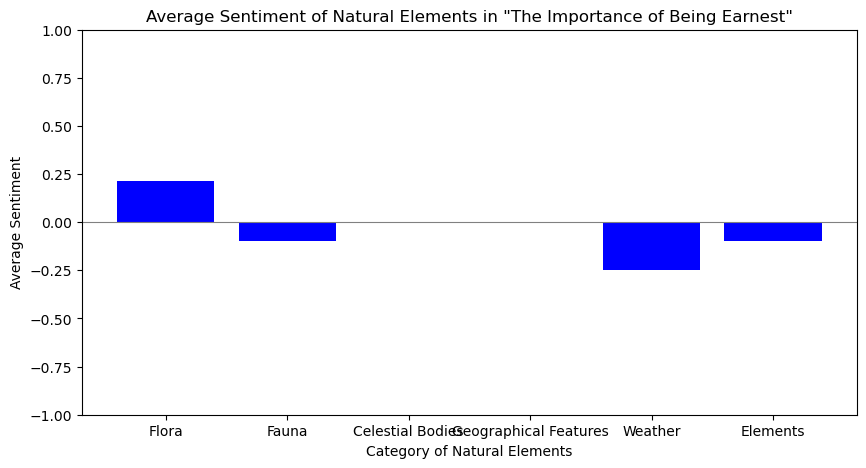

In [17]:
# Get sentiments for each category
category_sentiments = analyze_sentiment_by_category(play_text)

# Calculate average sentiment per category
average_sentiments = {category: sum(sentiments) / len(sentiments) if sentiments else 0 for category, sentiments in category_sentiments.items()}

# Create a bar chart
categories = list(average_sentiments.keys())
values = [average_sentiments[category] for category in categories]

plt.figure(figsize=(10, 5))
plt.bar(categories, values, color='blue')
plt.xlabel('Category of Natural Elements')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment of Natural Elements in "The Importance of Being Earnest"')
plt.ylim(-1, 1)  # Sentiment ranges from -1 to 1
plt.axhline(0, color='gray', linewidth=0.8)  # Add a line at sentiment zero for reference
plt.show()


Scale up to different texts:

In [27]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')

# Define categories of natural elements
categories = {
    'Flora': ["tree", "flower", "grass", "vine", "shrub", "herb", "bush", "leaf", "petal", "blossom", "thorn", "rose", "daisy", "tulip", "orchid", "lily", "fern", "palm", "oak", "pine", "birch", "maple"],
    'Fauna': ["bird", "fish", "mammal", "insect", "beast", "worm", "spider", "dog", "cat", "horse", "deer", "bear", "fox", "rabbit", "eagle", "hawk", "trout", "salmon", "butterfly", "bee", "ant", "frog"],
    'Celestial Bodies': ["sun", "moon", "star", "comet", "planet", "galaxy", "meteor", "constellation"],
    'Geographical Features': ["mountain", "hill", "valley", "island", "peninsula", "beach", "desert", "forest", "jungle", "river", "lake", "sea", "ocean", "bay", "creek", "peak", "cliff", "canyon", "dune", "plateau",],
    'Weather': ["rain", "storm", "wind", "fog", "mist", "snow", "ice", "hail", "cloud", "thunder", "lightning", "breeze", "gale", "hurricane", "tornado", "cyclone", "monsoon", "drizzle", "frost"],
    'Elements': ["fire", "water", "earth", "air", "stone", "rock", "lava", "mud", "sand", "dirt", "soil", "ash", "mineral", "crystal", "gem", "diamond", "sapphire", "emerald", "pearl", "gold", "silver", "copper", "iron", "coal"]
}

# Function to find sentences, categorize them, and analyze sentiment
def analyze_sentiment_by_category(text):
    sentiments = {category: [] for category in categories}

    for category, elements in categories.items():
        for element in elements:
            sentences = [sentence for sentence in text.split('.') if element in word_tokenize(sentence.lower())]
            for sentence in sentences:
                blob = TextBlob(sentence)
                sentiments[category].append(blob.sentiment.polarity)

    return sentiments

# Directory containing the texts
directory = '../data/'

# Initialize a dictionary to store average sentiment data
average_sentiments = {category: [] for category in categories}
text_labels = []

# Process each text file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()

        # Analyze sentiment for this text
        sentiments = analyze_sentiment_by_category(text)

        # Calculate average sentiment for each category
        for category in categories:
            if sentiments[category]:
                average = sum(sentiments[category]) / len(sentiments[category])
            else:
                average = 0  # No sentiments means average is zero
            average_sentiments[category].append(average)

        text_labels.append(filename.replace('.txt', ''))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


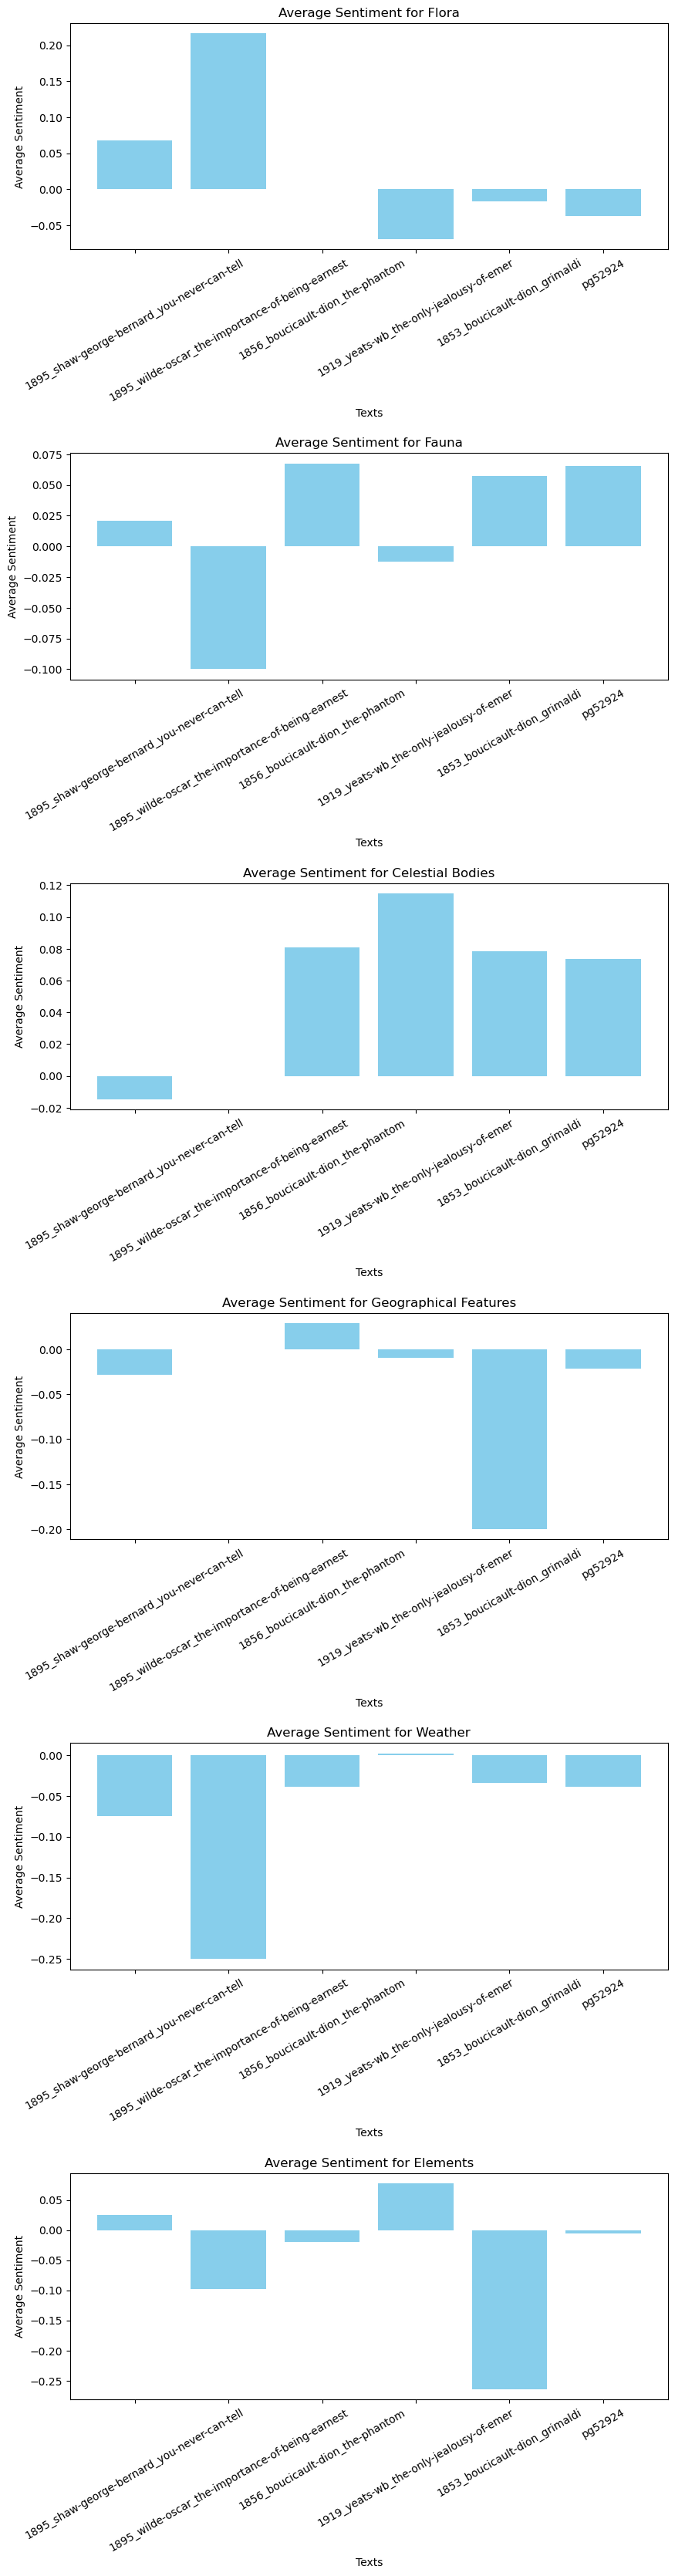

In [49]:
# Plotting the results
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 40))  # Increased figure size
for ax, (category, averages) in zip(axes.flatten(), average_sentiments.items()):
    ax.bar(text_labels, averages, color='skyblue')
    ax.set_title(f'Average Sentiment for {category}')
    ax.set_ylabel('Average Sentiment')
    ax.set_xlabel('Texts')
    ax.tick_params(axis='x', labelrotation=30)  # Ensure rotation is applied correctly

plt.subplots_adjust(hspace=.9)  # Adjust space between plots
plt.show()

We can also compare the use of certain keywords across plays to see whether they show up more or less.

In [50]:
import spacy
import matplotlib.pyplot as plt
import os

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Keywords you are interested in
keywords = ['tree', 'river', 'sun', 'mountain', 'cloud']

# Directory where your play texts are stored
directory = '../data/'

# Initialize a dictionary to hold the frequency data
frequency_data = {keyword: [] for keyword in keywords}
play_names = []

# Process each play in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Process the text with spaCy
        doc = nlp(text)
        
        # Count occurrences of each keyword
        counts = {keyword: 0 for keyword in keywords}
        for token in doc:
            if token.lemma_ in keywords:
                counts[token.lemma_] += 1

        # Append the count data and play name to our lists
        for keyword in keywords:
            frequency_data[keyword].append(counts[keyword])
        
        play_names.append(filename.replace('.txt', ''))  # Store play names without the file extension

/var/folders/xp/m387b0r56b9gyh5kbcztxmvc0000gn/T/ipykernel_99973/3379001113.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(play_names, rotation=30)  # Rotate and align the labels
/var/folders/xp/m387b0r56b9gyh5kbcztxmvc0000gn/T/ipykernel_99973/3379001113.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(play_names, rotation=30)  # Rotate and align the labels
/var/folders/xp/m387b0r56b9gyh5kbcztxmvc0000gn/T/ipykernel_99973/3379001113.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(play_names, rotation=30)  # Rotate and align the labels
/var/folders/xp/m387b0r56b9gyh5kbcztxmvc0000gn/T/ipykernel_99973/3379001113.py:9: UserWarning: set_ticklabels() should only be used with a 

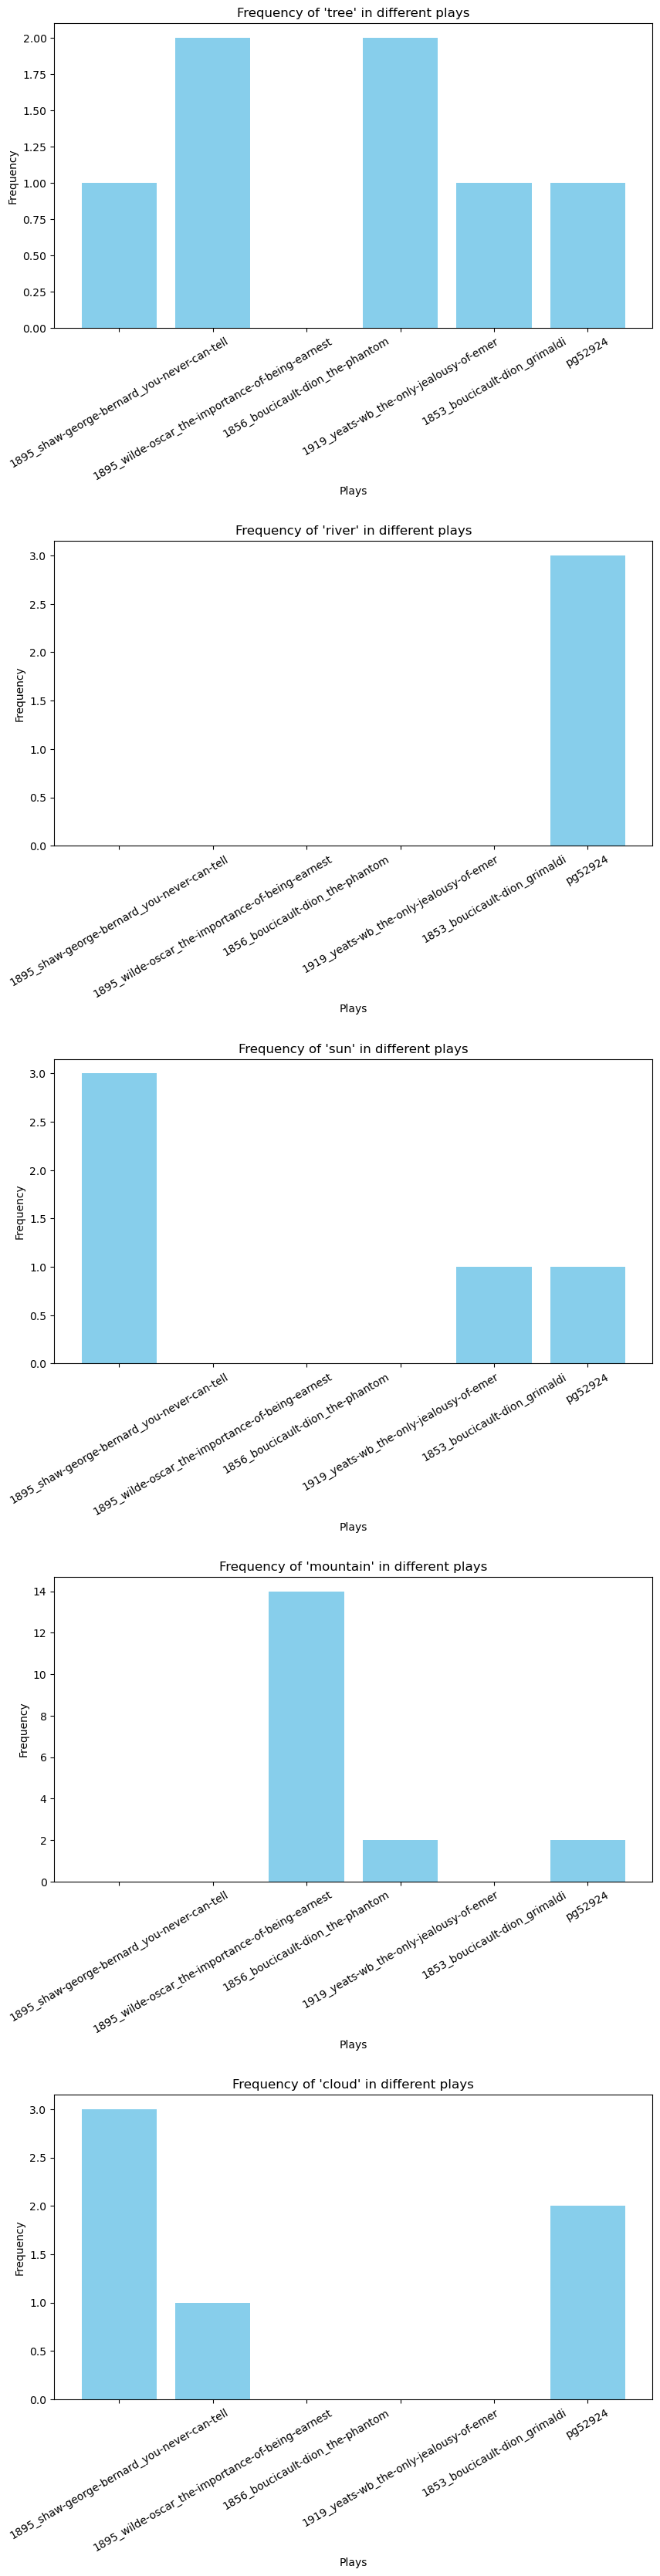

In [47]:
# Create a bar chart for each keyword
fig, axes = plt.subplots(len(keywords), 1, figsize=(10, 40))

for ax, keyword in zip(axes, keywords):
    bars = ax.bar(play_names, frequency_data[keyword], color='skyblue')
    ax.set_title(f"Frequency of '{keyword}' in different plays")
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Plays')
    ax.set_xticklabels(play_names, rotation=30)  # Rotate and align the labels

plt.subplots_adjust(hspace=.7)  # Adjust space between plots
plt.show()